In [1]:
%matplotlib inline

import random

import matplotlib
import matplotlib.pyplot as plt

from math import sqrt

import simulation.Networks as Network
import simulation.Contagion as Contagion
import simulation.System as System
import simulation.MCMC as MCMC

random.seed(int("54e22d", 16))

steps = 10000
side = 16
spins = side * side

In [2]:
def observables(system, observations):
    E = 0.0
    M = 0.0
    S = system.wolffIsing.network.nodes
    for k in range(system.wolffIsing.network.numNodes):
        M += S[k]['spin']
        E -=  S[k]['spin'] * sum([S[neighbor]['spin'] for neighbor in system.wolffIsing.network.edges[k]])
    observations['absMeanEnergy'] += abs(0.5 * E) / (spins * steps)
    observations['absMeanMagnetization'] += abs(M) / (spins * steps)
    
def randomSpin(x, y):
    return {'spin': random.sample([-1, 1], 1)[0] }

In [3]:
def experiment(temperature):
    network = Network.Lattice2DNP(side, side, {}, {})
    network.build(randomSpin)
    contagion = Contagion.WolffIsing(network, 1/float(temperature), random.random)
    system = System.WolffIsing(contagion, random.randint)
    montecarlo = MCMC.MCMC(system, random.random)
    observations = {'absMeanEnergy': 0, 'absMeanMagnetization': 0}
    montecarlo.simulate(observables, observations, steps)
    return (observations['absMeanEnergy'], observations['absMeanMagnetization'])

In [4]:
temperatures = [float(x)/20 for x in range(1, 100)]
results = [x for x in map(experiment, temperatures)]

In [5]:
mags = [x[1] for x in results]
energies = [x[0] for x in results]

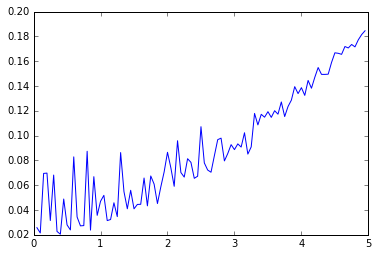

In [6]:
plt.plot(temperatures, list(mags))

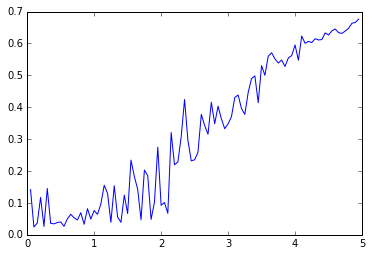

In [7]:
plt.plot(temperatures, list(energies))